<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%9F%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D1%83%D1%80%D0%BE%D0%B2%D0%BD%D1%8F_Native_Speakers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz
<ipython-input-1-4005d4608820>:142: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


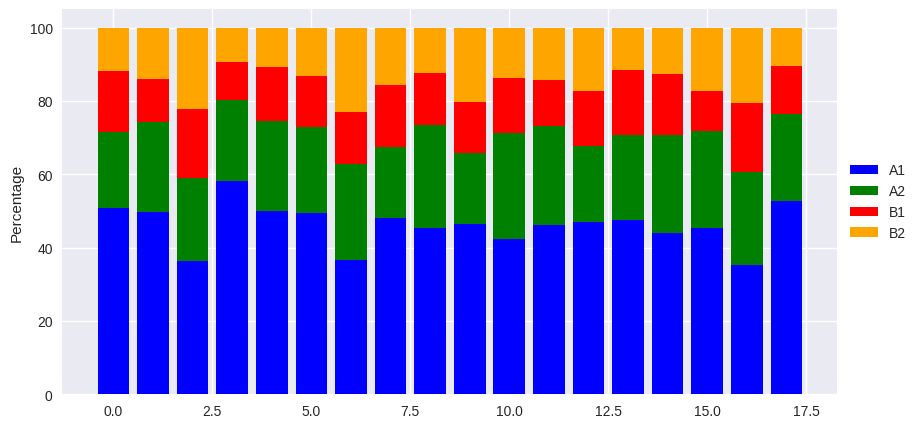

In [1]:
import glob
import os
from pymystem3 import Mystem
import string
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mystem = Mystem()

#folder path с текстами учеников
students_path = r"/content/Students_texts"
text_contents = {}

#тут будет количество уникальных лемм
x_data = []

for text_path in glob.glob(students_path + "/*.txt"):
    with open(text_path, "r", encoding='utf-8') as file:
        file_name = os.path.basename(text_path) # Ключи тут являются названиями файлов текстов
        text = file.read()
        lemmas = [lemma for lemma in mystem.lemmatize(text) 
                  if lemma.strip() and not all(c in string.punctuation or c.isspace() for c in lemma) # убираем знаки препинания
                  and not any(c.isalpha() and ord(c) < 128 for c in lemma)] # убираем леммы без кириллицы
        lemmas = list(set(lemmas)) # Оставляем только уникальные леммы
        x_data.append(len(lemmas)) # записываем количество уникальных лемм каждого текста
        text_contents[file_name] = lemmas


# Загружаем частотный словарь для каждой тысячи слов
df = pd.read_csv('ru_m3.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
df = df[['Lemma','CEFR']]
mark1 = "a1"
mark2 = "a2"
mark3 = "b1"
mark4 = "b2"
mark5 = "A1"
mark6 = "A2"
mark7 = "B1"
mark8 = "B2"
dc1 = df.query('CEFR == @mark1 | CEFR == @mark5')
dc2 = df.query('CEFR == @mark2 | CEFR == @mark6')
dc3 = df.query('CEFR == @mark3 | CEFR == @mark7')
dc4 = df.query('CEFR == @mark4 | CEFR == @mark8')

l = []
for word in dc1['Lemma']:
  if word not in l:
    l.append(word)
slovar1 = l

l = []
for word in dc2['Lemma']:
  if word not in l:
    l.append(word)
slovar2 = l

l = []
for word in dc3['Lemma']:
  if word not in l:
    l.append(word)
slovar3 = l

l = []
for word in dc4['Lemma']:
  if word not in l:
    l.append(word)
slovar4 = l

# Matching lemmas для каждого уровня
y_data_1 = []
y_data_2 = []
y_data_3 = []
y_data_4 = []

for file_name, lines in text_contents.items():
    lv1 = 0
    lv2 = 0
    lv3 = 0
    lv4 = 0
    for i in lines:
        if i in slovar1:
            lv1 += 1
        if i in slovar2:
            lv2 += 1
        if i in slovar3:
            lv3 += 1
        if i in slovar4:
            lv4 += 1
    y_data_1.append(lv1)
    y_data_2.append(lv2)
    y_data_3.append(lv3)
    y_data_4.append(lv4)

#Unmatched lemmas
y_data_5 = []

for i in range(len(y_data_1)):
    diff = x_data[i] - y_data_1[i] - y_data_2[i] - y_data_3[i] - y_data_4[i]
    y_data_5.append(diff)

info = []
info = list(text_contents.keys())
name_to_number = {}


for i, name in enumerate(set(info)):
    name_to_number[name] = i

info_n = [i for i in range(len(info))] # Заменяем имена на цифры для bar graph



percentages_1 = [y / x * 100 for y, x in zip(y_data_1, x_data)]
percentages_2 = [y / x * 100 for y, x in zip(y_data_2, x_data)]
percentages_3 = [y / x * 100 for y, x in zip(y_data_3, x_data)]
percentages_4 = [y / x * 100 for y, x in zip(y_data_4, x_data)]
percentages_5 = [y / x * 100 for y, x in zip(y_data_5, x_data)]


# Записываем данные словарь и из него делаем dataframe
dict = {'Number': info_n, 'File_Name': info, 'Unique_Lemmas': x_data, 'A1 %':percentages_1, 'A2 %':percentages_2, 'B1 %':percentages_3, 'B2 %':percentages_4, 'Unmatched lemmas %':percentages_5}

df = pd.DataFrame(dict)

# Сохраняем dataframe как csv файл
df.to_csv("students_data.csv", encoding='utf-8', index=False)

for i in range(len(y_data_1)):
    x_data[i] = x_data[i] - y_data_5[i]

percentages_1 = [y / x * 100 for y, x in zip(y_data_1, x_data)]
percentages_2 = [y / x * 100 for y, x in zip(y_data_2, x_data)]
percentages_3 = [y / x * 100 for y, x in zip(y_data_3, x_data)]
percentages_4 = [y / x * 100 for y, x in zip(y_data_4, x_data)]

colors = ['blue', 'green', 'red', 'orange']

plt.figure(figsize=(10, 5))
plt.style.use('seaborn')


plt.bar(info_n, percentages_1, color=colors[0])
plt.bar(info_n, percentages_2, bottom=percentages_1, color=colors[1])
plt.bar(info_n, percentages_3, bottom=np.add(percentages_1, percentages_2), color=colors[2])
plt.bar(info_n, percentages_4, bottom=np.add(np.add(percentages_1, percentages_2), percentages_3), color=colors[3])

labels = ['A1', 'A2', 'B1', 'B2']

plt.legend(labels, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks()
plt.ylabel('Percentage')
plt.show()

In [2]:
df = pd.read_csv('lemmas_levels.csv', sep=',')
df.index = np.arange(1, len(df) + 1)
mark1 = "1E"
mark2 = "2I"
mark3 = "3AU"
mark4 = "4S"
ll1 = df.query('level == @mark1')
ll2 = df.query('level == @mark2')
ll3 = df.query('level == @mark3')
ll4 = df.query('level == @mark4')

In [3]:
slovar1 = ll1['lemma'].str.strip('\'').tolist()
slovar2 = ll2['lemma'].str.strip('\'').tolist()
slovar3 = ll3['lemma'].str.strip('\'').tolist()
slovar4 = ll4['lemma'].str.strip('\'').tolist()

<ipython-input-4-821ea53164bf>:71: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


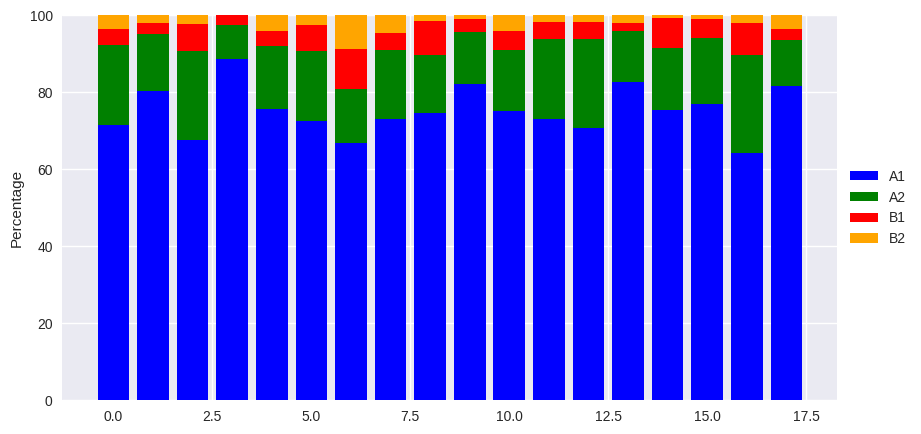

In [4]:
# Matching lemmas для каждого уровня
y_data_1 = []
y_data_2 = []
y_data_3 = []
y_data_4 = []

for file_name, lines in text_contents.items():
    lv1 = 0
    lv2 = 0
    lv3 = 0
    lv4 = 0
    for i in lines:
        if i in slovar1:
            lv1 += 1
        if i in slovar2:
            lv2 += 1
        if i in slovar3:
            lv3 += 1
        if i in slovar4:
            lv4 += 1
    y_data_1.append(lv1)
    y_data_2.append(lv2)
    y_data_3.append(lv3)
    y_data_4.append(lv4)

#Unmatched lemmas
y_data_5 = []

for i in range(len(y_data_1)):
    diff = x_data[i] - y_data_1[i] - y_data_2[i] - y_data_3[i] - y_data_4[i]
    y_data_5.append(diff)

info = []
info = list(text_contents.keys())
name_to_number = {}


for i, name in enumerate(set(info)):
    name_to_number[name] = i

info_n = [i for i in range(len(info))] # Заменяем имена на цифры для bar graph



percentages_1 = [y / x * 100 for y, x in zip(y_data_1, x_data)]
percentages_2 = [y / x * 100 for y, x in zip(y_data_2, x_data)]
percentages_3 = [y / x * 100 for y, x in zip(y_data_3, x_data)]
percentages_4 = [y / x * 100 for y, x in zip(y_data_4, x_data)]
percentages_5 = [y / x * 100 for y, x in zip(y_data_5, x_data)]


# Записываем данные словарь и из него делаем dataframe
dict = {'Number': info_n, 'File_Name': info, 'Unique_Lemmas': x_data, 'A1 %':percentages_1, 'A2 %':percentages_2, 'B1 %':percentages_3, 'B2 %':percentages_4, 'Unmatched lemmas %':percentages_5}

df = pd.DataFrame(dict)

# Сохраняем dataframe как csv файл
df.to_csv("students_data.csv", encoding='utf-8', index=False)

for i in range(len(y_data_1)):
    x_data[i] = x_data[i] - y_data_5[i]

percentages_1 = [y / x * 100 for y, x in zip(y_data_1, x_data)]
percentages_2 = [y / x * 100 for y, x in zip(y_data_2, x_data)]
percentages_3 = [y / x * 100 for y, x in zip(y_data_3, x_data)]
percentages_4 = [y / x * 100 for y, x in zip(y_data_4, x_data)]

colors = ['blue', 'green', 'red', 'orange']

plt.figure(figsize=(10, 5))
plt.style.use('seaborn')


plt.bar(info_n, percentages_1, color=colors[0])
plt.bar(info_n, percentages_2, bottom=percentages_1, color=colors[1])
plt.bar(info_n, percentages_3, bottom=np.add(percentages_1, percentages_2), color=colors[2])
plt.bar(info_n, percentages_4, bottom=np.add(np.add(percentages_1, percentages_2), percentages_3), color=colors[3])

labels = ['A1', 'A2', 'B1', 'B2']

plt.legend(labels, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks()
plt.ylabel('Percentage')
plt.show()

In [5]:
df = pd.read_csv('A1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
A1 = df[:754]

In [6]:
df = pd.read_csv('A2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
A2 = df[:1048]

In [7]:
df = pd.read_csv('B1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
B1 = df[:1081]

In [8]:
df = pd.read_csv('B2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
B2 = df[:3331]

In [9]:
slovar1 = A1['Lemma'].str.lower().tolist()
slovar2 = A2['Unnamed: 0'].str.lower().tolist()
slovar3 = B1['Lemma'].str.lower().tolist()
slovar4 = B2['Lemma'].str.lower().tolist()

<ipython-input-10-821ea53164bf>:71: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


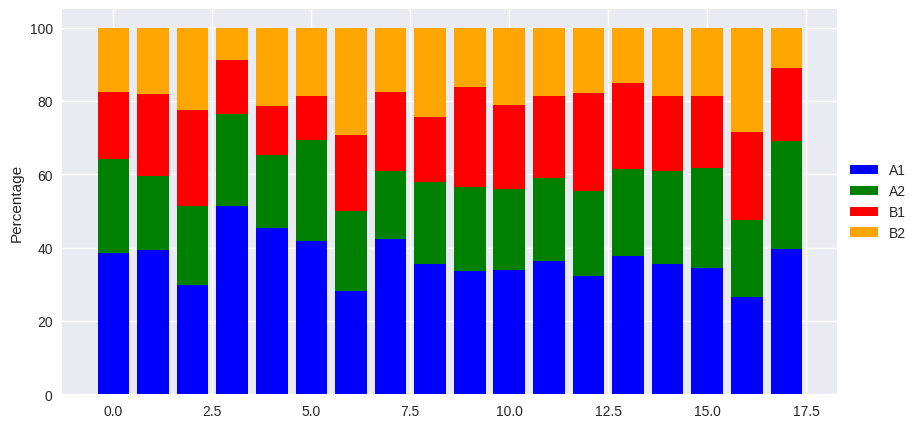

In [10]:
# Matching lemmas для каждого уровня
y_data_1 = []
y_data_2 = []
y_data_3 = []
y_data_4 = []

for file_name, lines in text_contents.items():
    lv1 = 0
    lv2 = 0
    lv3 = 0
    lv4 = 0
    for i in lines:
        if i in slovar1:
            lv1 += 1
        if i in slovar2:
            lv2 += 1
        if i in slovar3:
            lv3 += 1
        if i in slovar4:
            lv4 += 1
    y_data_1.append(lv1)
    y_data_2.append(lv2)
    y_data_3.append(lv3)
    y_data_4.append(lv4)

#Unmatched lemmas
y_data_5 = []

for i in range(len(y_data_1)):
    diff = x_data[i] - y_data_1[i] - y_data_2[i] - y_data_3[i] - y_data_4[i]
    y_data_5.append(diff)

info = []
info = list(text_contents.keys())
name_to_number = {}


for i, name in enumerate(set(info)):
    name_to_number[name] = i

info_n = [i for i in range(len(info))] # Заменяем имена на цифры для bar graph



percentages_1 = [y / x * 100 for y, x in zip(y_data_1, x_data)]
percentages_2 = [y / x * 100 for y, x in zip(y_data_2, x_data)]
percentages_3 = [y / x * 100 for y, x in zip(y_data_3, x_data)]
percentages_4 = [y / x * 100 for y, x in zip(y_data_4, x_data)]
percentages_5 = [y / x * 100 for y, x in zip(y_data_5, x_data)]


# Записываем данные словарь и из него делаем dataframe
dict = {'Number': info_n, 'File_Name': info, 'Unique_Lemmas': x_data, 'A1 %':percentages_1, 'A2 %':percentages_2, 'B1 %':percentages_3, 'B2 %':percentages_4, 'Unmatched lemmas %':percentages_5}

df = pd.DataFrame(dict)

# Сохраняем dataframe как csv файл
df.to_csv("students_data.csv", encoding='utf-8', index=False)

for i in range(len(y_data_1)):
    x_data[i] = x_data[i] - y_data_5[i]

percentages_1 = [y / x * 100 for y, x in zip(y_data_1, x_data)]
percentages_2 = [y / x * 100 for y, x in zip(y_data_2, x_data)]
percentages_3 = [y / x * 100 for y, x in zip(y_data_3, x_data)]
percentages_4 = [y / x * 100 for y, x in zip(y_data_4, x_data)]

colors = ['blue', 'green', 'red', 'orange']

plt.figure(figsize=(10, 5))
plt.style.use('seaborn')


plt.bar(info_n, percentages_1, color=colors[0])
plt.bar(info_n, percentages_2, bottom=percentages_1, color=colors[1])
plt.bar(info_n, percentages_3, bottom=np.add(percentages_1, percentages_2), color=colors[2])
plt.bar(info_n, percentages_4, bottom=np.add(np.add(percentages_1, percentages_2), percentages_3), color=colors[3])

labels = ['A1', 'A2', 'B1', 'B2']

plt.legend(labels, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks()
plt.ylabel('Percentage')
plt.show()

In [11]:
df = pd.read_csv('new_vocab_a1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv1 = df

In [12]:
df = pd.read_csv('new_vocab_a2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv2 = df

In [13]:
df = pd.read_csv('new_vocab_b1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv3 = df

In [14]:
df = pd.read_csv('new_vocab_b2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv4 = df

In [15]:
slovar1 = nv1['а'].str.lower().tolist()
data8 = nv2['а'].str.lower().tolist()
slovar2 = list(set(data8) - set(slovar1))
data7 = nv3['а'].str.lower().tolist()
slovar3 = list(set(data7) - set(data8))
data6 = nv4['а'].str.lower().tolist()
slovar4 = list(set(data6) - set(data7))

<ipython-input-16-821ea53164bf>:71: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


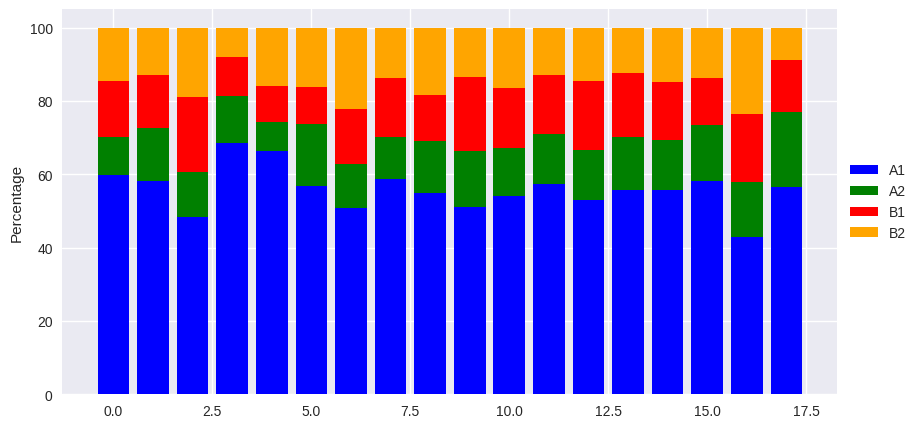

In [16]:
# Matching lemmas для каждого уровня
y_data_1 = []
y_data_2 = []
y_data_3 = []
y_data_4 = []

for file_name, lines in text_contents.items():
    lv1 = 0
    lv2 = 0
    lv3 = 0
    lv4 = 0
    for i in lines:
        if i in slovar1:
            lv1 += 1
        if i in slovar2:
            lv2 += 1
        if i in slovar3:
            lv3 += 1
        if i in slovar4:
            lv4 += 1
    y_data_1.append(lv1)
    y_data_2.append(lv2)
    y_data_3.append(lv3)
    y_data_4.append(lv4)

#Unmatched lemmas
y_data_5 = []

for i in range(len(y_data_1)):
    diff = x_data[i] - y_data_1[i] - y_data_2[i] - y_data_3[i] - y_data_4[i]
    y_data_5.append(diff)

info = []
info = list(text_contents.keys())
name_to_number = {}


for i, name in enumerate(set(info)):
    name_to_number[name] = i

info_n = [i for i in range(len(info))] # Заменяем имена на цифры для bar graph



percentages_1 = [y / x * 100 for y, x in zip(y_data_1, x_data)]
percentages_2 = [y / x * 100 for y, x in zip(y_data_2, x_data)]
percentages_3 = [y / x * 100 for y, x in zip(y_data_3, x_data)]
percentages_4 = [y / x * 100 for y, x in zip(y_data_4, x_data)]
percentages_5 = [y / x * 100 for y, x in zip(y_data_5, x_data)]


# Записываем данные словарь и из него делаем dataframe
dict = {'Number': info_n, 'File_Name': info, 'Unique_Lemmas': x_data, 'A1 %':percentages_1, 'A2 %':percentages_2, 'B1 %':percentages_3, 'B2 %':percentages_4, 'Unmatched lemmas %':percentages_5}

df = pd.DataFrame(dict)

# Сохраняем dataframe как csv файл
df.to_csv("students_data.csv", encoding='utf-8', index=False)

for i in range(len(y_data_1)):
    x_data[i] = x_data[i] - y_data_5[i]

percentages_1 = [y / x * 100 for y, x in zip(y_data_1, x_data)]
percentages_2 = [y / x * 100 for y, x in zip(y_data_2, x_data)]
percentages_3 = [y / x * 100 for y, x in zip(y_data_3, x_data)]
percentages_4 = [y / x * 100 for y, x in zip(y_data_4, x_data)]

colors = ['blue', 'green', 'red', 'orange']

plt.figure(figsize=(10, 5))
plt.style.use('seaborn')


plt.bar(info_n, percentages_1, color=colors[0])
plt.bar(info_n, percentages_2, bottom=percentages_1, color=colors[1])
plt.bar(info_n, percentages_3, bottom=np.add(percentages_1, percentages_2), color=colors[2])
plt.bar(info_n, percentages_4, bottom=np.add(np.add(percentages_1, percentages_2), percentages_3), color=colors[3])

labels = ['A1', 'A2', 'B1', 'B2']

plt.legend(labels, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks()
plt.ylabel('Percentage')
plt.show()